In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [137]:
df = pd.read_csv("supermarket_sales.csv")

In [138]:
df

,invoice_id,branch,city,customer_type,gender_customer,product_line,unit_cost,quantity,5pct_markup,revenue,date,time,payment_method,cogs,gm_pct,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01/05/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03/08/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02/08/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,03/02/19,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,02/09/19,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [140]:
missing_data = df.isnull().sum()
print(missing_data)

invoice_id         0
branch             0
city               0
customer_type      0
gender_customer    0
product_line       0
unit_cost          0
quantity           0
5pct_markup        0
revenue            0
date               0
time               0
payment_method     0
cogs               0
gm_pct             0
gross_income       0
rating             0
dtype: int64


In [143]:
df['unit_cost'].fillna(df['unit_cost'].median(), inplace=True)
df['quantity'].fillna(df['quantity'].median(), inplace=True)

In [145]:
#inpute missing values
df['customer_type'].fillna(df['customer_type'].mode()[0], inplace=True)
df['payment_method'].fillna(df['payment_method'].mode()[0], inplace=True)

In [147]:
df['date'] = pd.to_datetime(df['date'], format = "mixed")
df['time'] = pd.to_datetime(df['time'], format = "mixed")

In [148]:
df

,invoice_id,branch,city,customer_type,gender_customer,product_line,unit_cost,quantity,5pct_markup,revenue,date,time,payment_method,cogs,gm_pct,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2024-10-02 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2024-10-02 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2024-10-02 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2024-10-02 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2024-10-02 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,2024-10-02 13:46:00,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,2024-10-02 17:16:00,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,2024-10-02 13:22:00,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,2024-10-02 15:33:00,Cash,65.82,4.761905,3.2910,4.1


In [151]:
def categorize_time(time):
    hour = time.hour
    if 5 <= hour <12:
        return "morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"
    
df['time_of_day'] = df['time'].apply(lambda x: categorize_time(x))

In [152]:
df

,invoice_id,branch,city,customer_type,gender_customer,product_line,unit_cost,quantity,5pct_markup,revenue,date,time,payment_method,cogs,gm_pct,gross_income,rating,time_of_day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2024-10-02 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Afternoon
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2024-10-02 10:29:00,Cash,76.40,4.761905,3.8200,9.6,morning
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2024-10-02 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Afternoon
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2024-10-02 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Evening
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2024-10-02 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,2024-10-02 13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,Afternoon
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,2024-10-02 17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,Evening
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,2024-10-02 13:22:00,Cash,31.84,4.761905,1.5920,7.7,Afternoon
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,2024-10-02 15:33:00,Cash,65.82,4.761905,3.2910,4.1,Afternoon


In [153]:
df['total_cost'] = df['unit_cost'] * df['quantity']

df['profit_margin'] = df['gross_income'] / df['revenue']

In [154]:
df

,invoice_id,branch,city,customer_type,gender_customer,product_line,unit_cost,quantity,5pct_markup,revenue,date,time,payment_method,cogs,gm_pct,gross_income,rating,time_of_day,total_cost,profit_margin
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2024-10-02 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Afternoon,522.83,0.047619
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2024-10-02 10:29:00,Cash,76.40,4.761905,3.8200,9.6,morning,76.40,0.047619
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2024-10-02 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Afternoon,324.31,0.047619
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2024-10-02 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Evening,465.76,0.047619
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2024-10-02 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,morning,604.17,0.047619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,2024-10-02 13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,Afternoon,40.35,0.047619
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,2024-10-02 17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,Evening,973.80,0.047619
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,2024-10-02 13:22:00,Cash,31.84,4.761905,1.5920,7.7,Afternoon,31.84,0.047619
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,2024-10-02 15:33:00,Cash,65.82,4.761905,3.2910,4.1,Afternoon,65.82,0.047619


In [155]:
print(df.mean(numeric_only = True))

unit_cost         55.672130
quantity           5.510000
5pct_markup       15.379369
revenue          322.966749
cogs             307.587380
gm_pct             4.761905
gross_income      15.379369
rating             6.972700
total_cost       307.587380
profit_margin      0.047619
dtype: float64


In [156]:
set = ["unit_cost", "quantity", "5pct_markup", "revenue", "cogs", "gm_pct", "gross_income",
      "rating", "total_cost", "profit_margin"]
print(df.head())

    invoice_id branch       city customer_type gender_customer  \
0  750-67-8428      A     Yangon        Member          Female   
1  226-31-3081      C  Naypyitaw        Normal          Female   
2  631-41-3108      A     Yangon        Normal            Male   
3  123-19-1176      A     Yangon        Member            Male   
4  373-73-7910      A     Yangon        Normal            Male   

             product_line  unit_cost  quantity  5pct_markup   revenue  \
0       Health and beauty      74.69         7      26.1415  548.9715   
1  Electronic accessories      15.28         5       3.8200   80.2200   
2      Home and lifestyle      46.33         7      16.2155  340.5255   
3       Health and beauty      58.22         8      23.2880  489.0480   
4       Sports and travel      86.31         7      30.2085  634.3785   

        date                time payment_method    cogs    gm_pct  \
0 2019-01-05 2024-10-02 13:08:00        Ewallet  522.83  4.761905   
1 2019-03-08 2024-10-02 10

In [157]:
categorical_columns = ['branch', 'city', 'customer_type', 'gender_customer', 
                       'product_line', 'payment_method']
for col in categorical_columns:
    print("f\n{col} distribution:")
    print(df[col].value_counts())

f
{col} distribution:
branch
A    340
B    332
C    328
Name: count, dtype: int64
f
{col} distribution:
city
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64
f
{col} distribution:
customer_type
Member    501
Normal    499
Name: count, dtype: int64
f
{col} distribution:
gender_customer
Female    501
Male      499
Name: count, dtype: int64
f
{col} distribution:
product_line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64
f
{col} distribution:
payment_method
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64


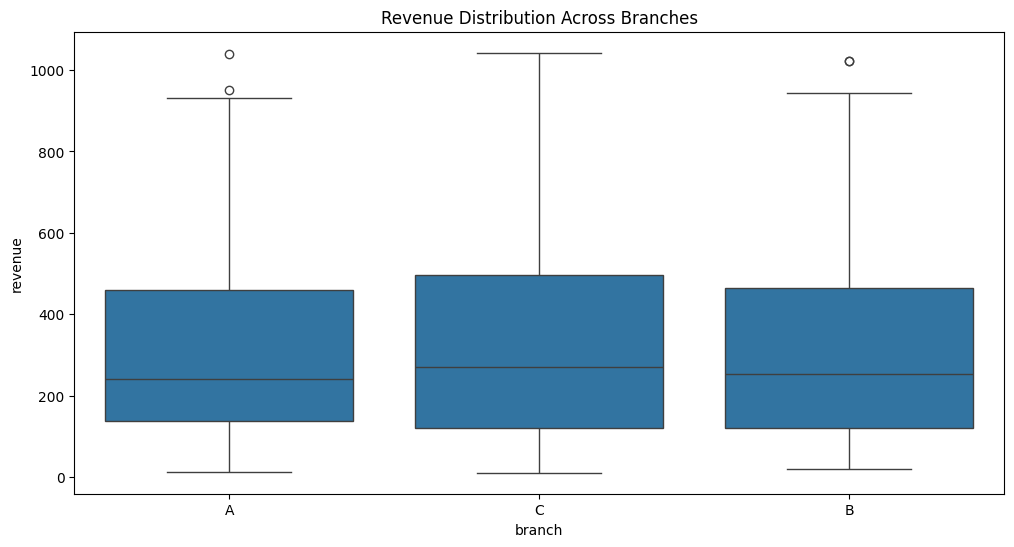

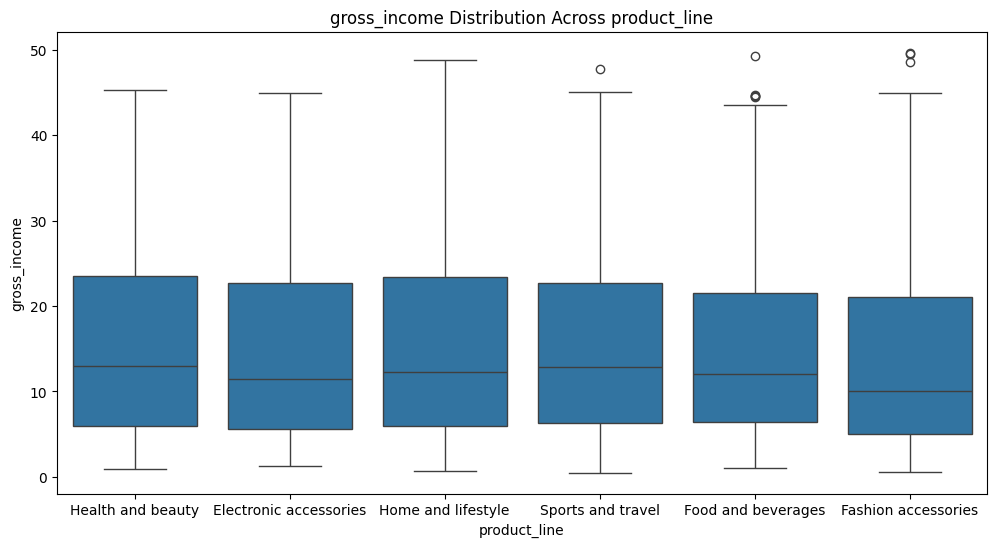

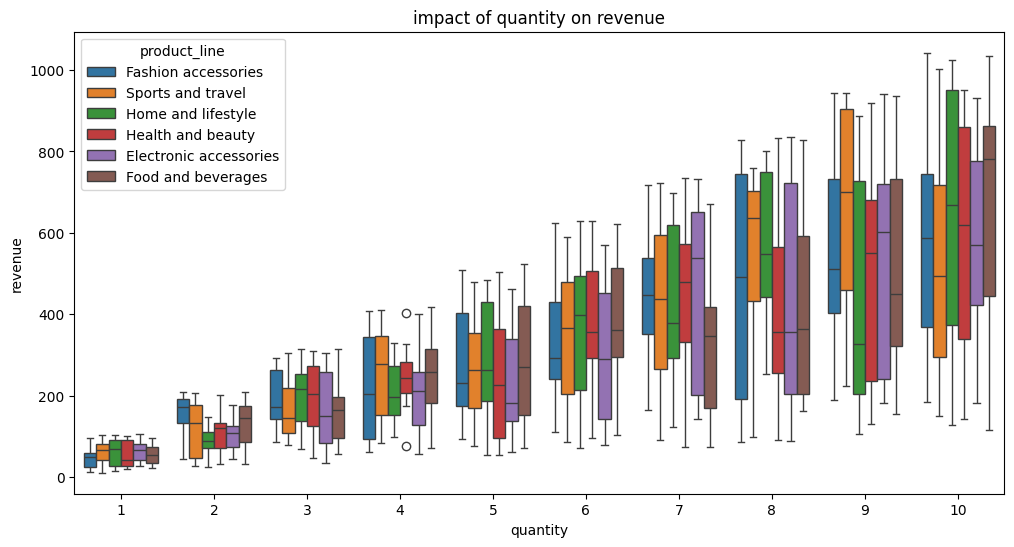

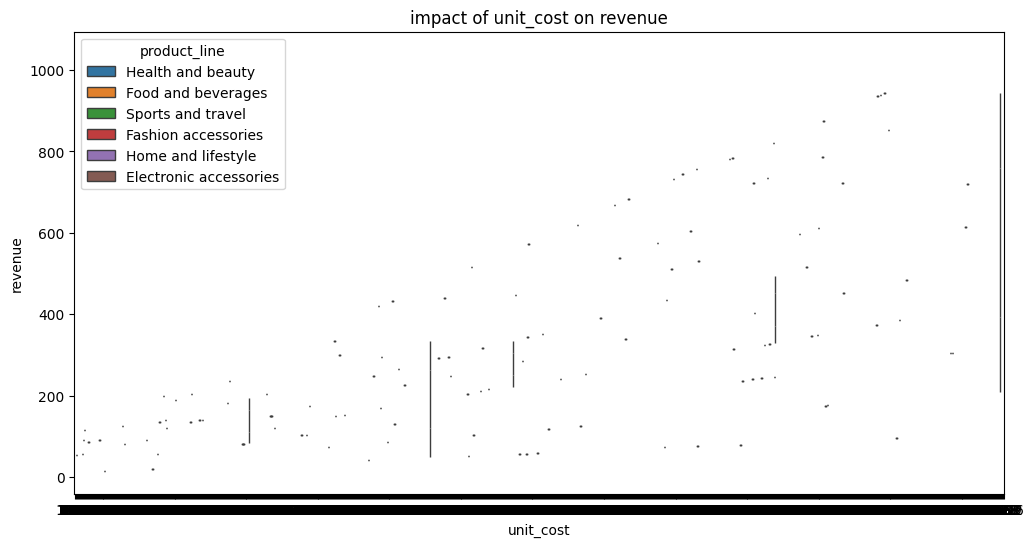

In [158]:
plt.figure(figsize = (12,6))
sns.boxplot(x = "branch", y='revenue', data = df)
plt.title('Revenue Distribution Across Branches')
plt.show()

plt.figure(figsize = (12,6))
sns.boxplot(x = "product_line", y='gross_income', data = df)
plt.title('gross_income Distribution Across product_line')
plt.show()

plt.figure(figsize = (12,6))
sns.boxplot(x = "quantity", y='revenue', hue= 'product_line', data = df)
plt.title('impact of quantity on revenue')
plt.show()

plt.figure(figsize = (12,6))
sns.boxplot(x = "unit_cost", y='revenue', hue= 'product_line', data = df)
plt.title('impact of unit_cost on revenue')
plt.show()

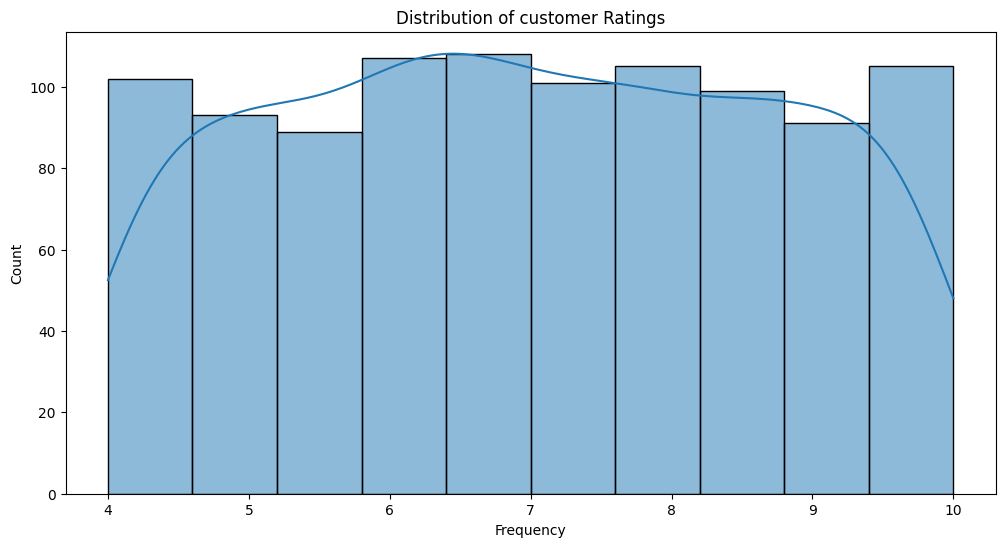

In [159]:
plt.figure(figsize = (12,6))
sns.histplot(df['rating'], bins=10, kde=True)
plt.title('Distribution of customer Ratings')
plt.xlabel('Rating')
plt.xlabel('Frequency')
plt.show()

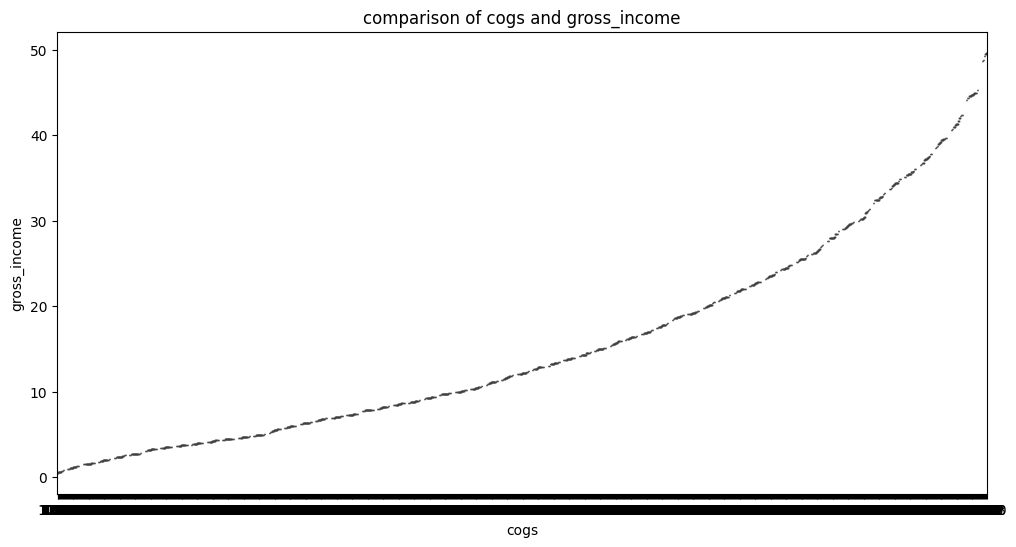

In [160]:
plt.figure(figsize = (12,6))
sns.boxplot(x = "cogs", y='gross_income', data = df)
plt.title('comparison of cogs and gross_income')
plt.show()

<Axes: xlabel='gross_income', ylabel='revenue'>

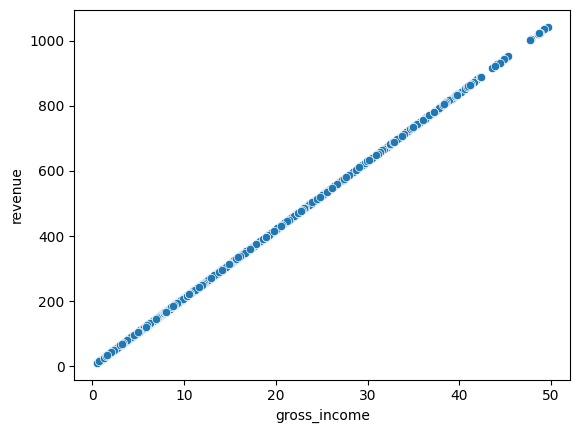

In [161]:
sns.scatterplot(x='gross_income', y='revenue', data = df)

In [162]:
df.corr(numeric_only = True)

,unit_cost,quantity,5pct_markup,revenue,cogs,gm_pct,gross_income,rating,total_cost,profit_margin
unit_cost,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778,0.633962,0.006434
quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815,0.705510,-0.063044
5pct_markup,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,1.000000,-0.050440
revenue,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,1.000000,-0.050440
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,1.000000,-0.050440
gm_pct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross_income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,1.000000,-0.050440
rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000,-0.036442,0.022262
total_cost,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,1.000000,-0.050440
profit_margin,0.006434,-0.063044,-0.050440,-0.050440,-0.050440,NaN,-0.050440,0.022262,-0.050440,1.000000


In [165]:
tas = df.corr(numeric_only = True)

<Axes: >

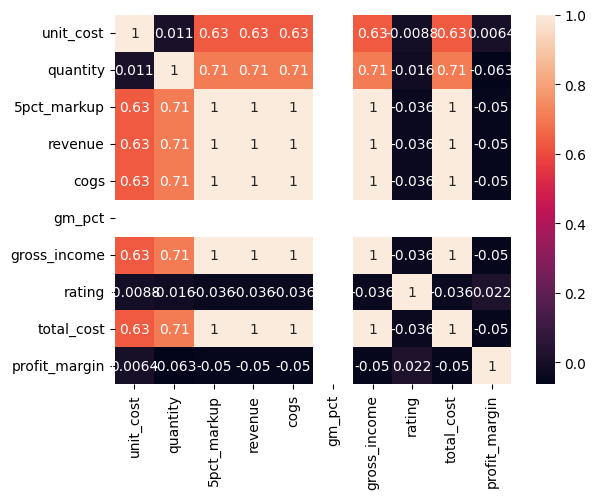

In [171]:
sns.heatmap(tas, annot = True)

In [172]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [173]:
label_encoders = {}
categorical_columns = ['branch', 'city', 'customer_type', 'gender_customer', 
                       'product_line', 'payment_method']
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
  

In [174]:
features = df[[ 'gross_income', 'total_cost', 'quantity']]
target = df['revenue']

In [175]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [176]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [177]:
linearmodel = LinearRegression()

In [178]:
linearmodel.fit(X_train,y_train)

LinearRegression()

In [179]:
linpred = linearmodel.predict(X_test)

In [180]:
linearmodel.score(X_test,y_test)

1.0

In [181]:
lm_rmse = np.sqrt(mean_squared_error(y_test, linpred))
print(lm_rmse)

1.0898756285734391e-13


In [182]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [183]:
dt_pred = dt_model.predict(X_test)

In [184]:
rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
print(rmse)

1.196163852697448


In [185]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [186]:
rf_pred = rf_model.predict(X_test)

In [187]:
rf_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
print(rf_rmse)

1.196163852697448


In [188]:
gradient_model = GradientBoostingRegressor(random_state = 42)
gradient_model.fit(X_train,y_train)

GradientBoostingRegressor(random_state=42)

In [189]:
gm_predict = gradient_model.predict(X_test)

In [190]:
gb_rmse = np.sqrt(mean_squared_error(y_test, gm_predict))
print(gb_rmse)

2.103135708598894


In [191]:

models = [rf_model,gradient_model]
param_grid = {
    'n_estimators': [50,100, 200],
    'max_depth': [None ,10, 20, 30],
    'n_estimators': [2,5, 10] 
}

for model in models:
    grid_search = GridSearchCV(estimator = model, param_grid=param_grid, cv=3, 
                           scoring = 'neg_mean_squared_error', n_jobs = -1)
    grid_search.fit(X_train,y_train)

    best_model = grid_search.best_estimator_

    final_prediction = best_model.predict(X_test)
    final_RMSE = np.sqrt(mean_squared_error(y_test, final_prediction))
    print(f"final {model} Prediction: {final_RMSE}")

final RandomForestRegressor(random_state=42) Prediction: 0.9876303952810653
final GradientBoostingRegressor(random_state=42) Prediction: 89.2977016664169


In [192]:
param_space = {'copy_X': [True,False], 
               'fit_intercept': [True,False], 
               'n_jobs': [1,5,10,15,None], 
               'positive': [True,False]}
random_search = RandomizedSearchCV(linearmodel, param_space, n_iter=40, cv=5)

random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_

final_prediction = best_model.predict(X_test)

final_RMSE = np.sqrt(mean_squared_error(y_test, final_prediction))
print(f"final linear Prediction: {final_RMSE}")

# Parameter which gives the best results
print(f"Best Hyperparameters: {random_search.best_params_}")

# Accuracy of the model after using best parameters
print(f"Best Score: {random_search.best_score_}")

final linear Prediction: 1.591796129120387e-13
Best Hyperparameters: {'positive': True, 'n_jobs': 1, 'fit_intercept': True, 'copy_X': True}
Best Score: 1.0


In [193]:
# Define the parameter grid to tune the hyperparameters
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator= dt_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_dtree_reg = grid_search.best_estimator_


y_pred = best_dtree_reg.predict(X_test)
final_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"final decision tree RSME: {final_RMSE}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
final decision tree RSME: 1.1868676530130686


In [194]:

df['predicted_revenue'] = best_model.predict(scaler.transform(features))
df['performance_category'] = np.where(df['predicted_revenue']> df['predicted_revenue'].median(),
                                      'High Revenue', 'Low Revenue')
print(df[['invoice_id', 'predicted_revenue', 'performance_category']].head())

    invoice_id  predicted_revenue performance_category
0  750-67-8428           548.9715         High Revenue
1  226-31-3081            80.2200          Low Revenue
2  631-41-3108           340.5255         High Revenue
3  123-19-1176           489.0480         High Revenue
4  373-73-7910           634.3785         High Revenue


In [195]:
import joblib
import pickle 

In [196]:
joblib.dump(linearmodel, 'linear_model.joblib')

['linear_model.joblib']

In [197]:
filename = 'finalized_model.sav'
reg = joblib.load('linear_model.joblib')

In [198]:
predictions = reg.predict(X_test)
predictions

array([523.971 , 616.98  , 408.7335, 135.3555,  45.927 , 618.975 ,
       127.827 , 731.6925, 450.1035, 138.1275, 422.73  , 463.428 ,
       212.7825, 252.252 , 290.0835, 331.128 , 587.664 , 216.846 ,
       757.365 , 185.094 , 416.178 , 166.236 , 128.016 , 125.706 ,
       247.8735, 195.594 , 742.2975,  30.996 , 145.5825,  56.469 ,
        75.5475, 609.    ,  96.1905, 432.768 , 193.011 , 174.3   ,
       667.38  , 198.639 , 193.074 , 192.843 , 214.746 , 922.635 ,
        74.7075, 180.873 ,  93.0405, 400.764 , 221.886 ,  68.2395,
       343.224 , 281.169 , 430.71  , 101.64  ,  69.09  , 269.934 ,
       181.44  , 494.1825, 461.5275,  60.816 , 456.288 , 222.138 ,
       121.128 ,  33.936 ,  84.756 , 942.4485, 381.3915, 510.615 ,
       370.125 , 760.452 , 939.54  , 118.251 , 391.419 , 127.26  ,
       293.139 ,  89.0715,  65.604 , 697.368 , 764.19  , 253.008 ,
        76.755 , 745.836 , 305.55  ,  70.287 , 352.5795, 614.943 ,
       218.0745, 270.585 ,  69.111 , 829.08  , 384.72  , 395.8

In [200]:
pickle.dump(linearmodel, open('mlmodel.sav', 'wb'))

In [ ]:
loaded_model = pickle.load(open('mlmodel.sav', 'rb'))